In [ ]:
# ... import...
import sys
sys.path.append('../src')  

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer


In [ ]:
# Import custom feature engineering module 
from features_engineering import (
    CUSTOMER_ID_COL, AMOUNT_COL, DATETIME_COL,
    FeatureEngineer
)

In [3]:

# 1. Load data and inspect columns
df = pd.read_csv('../data/raw/data.csv')
print(df.columns)
df.head()


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [ ]:

# 2. Define  categorical and numerical columns
exclude_cols = [CUSTOMER_ID_COL, DATETIME_COL]
categorical_cols = [
    col for col in df.select_dtypes(include=['object', 'category']).columns
    if col not in exclude_cols
]
numerical_cols = [
    AMOUNT_COL, 'total_transaction_amount', 'avg_transaction_amount',
    'transaction_count', 'std_transaction_amount', 'transaction_hour',
    'transaction_day', 'transaction_month', 'transaction_year'
]


In [5]:

# 3. Build pipeline
def build_pipeline(categorical_cols, numerical_cols, scaler_type='standard'):
    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    numerical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler() if scaler_type == 'standard' else MinMaxScaler())
    ])
    preprocessor = ColumnTransformer([
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])
    pipeline = Pipeline([
        ('feature_engineer', FeatureEngineer()),
        ('preprocessor', preprocessor)
    ])
    return pipeline

pipeline = build_pipeline(categorical_cols, numerical_cols, scaler_type='standard')
X_processed = pipeline.fit_transform(df)
print("Processed feature shape:", X_processed.shape)


Processed feature shape: (95662, 197783)


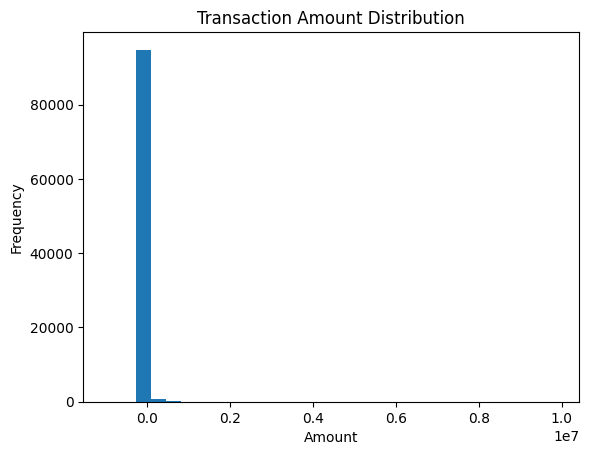

In [ ]:

# 4. Visualization example 
import matplotlib.pyplot as plt

plt.hist(df[AMOUNT_COL], bins=30)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()